In [2]:
from csv import DictReader
import collections
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
import operator
import numpy as np

data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

### Število nesreč, kjer je povzročitelj pijan

Procent nesrec, kjer je povzročitelj pijan (nad 0.5 promila): 6.30410237109522 %
Procent nesrec s smrtno zrtvijo: 0.48247706908435395 %
Procent nesrec s smrtno zrtvijo pri nesrecah, kjer je povzrocitelj pijan: 0.199203187250996 %


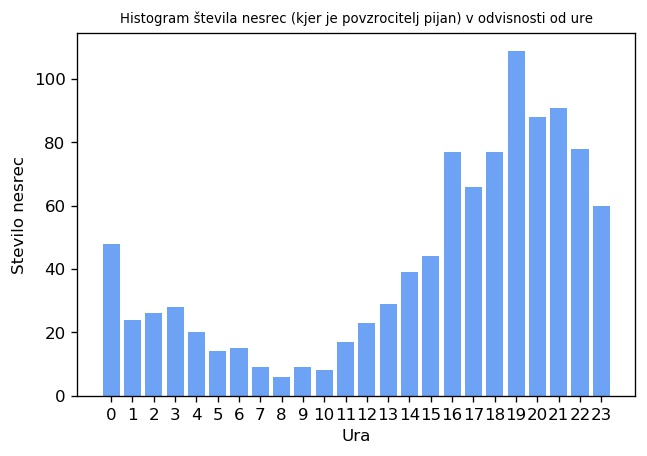

In [4]:
nesrece_poskodbe = dict()
smrtne_nesrece = 0
smrt_drunk_driver = 0
drunk_driver = 0
for row in data:
    idPN = int(row["ZaporednaStevilkaPN"])
    if idPN not in nesrece_poskodbe.keys():
        nesrece_poskodbe[idPN] = [list(), False]
    nesrece_poskodbe[idPN][0].append(row["PoskodbaUdelezenca"])
    alkotest = float("0" + row["VrednostAlkotesta"].replace(",", "."))
    if row["Povzrocitelj"] == "POVZROCITELJ":
        if alkotest > 0.5:
            nesrece_poskodbe[idPN][1] = True
for key, value in nesrece_poskodbe.items():
    if value[1]:
        drunk_driver += 1
    if "SMRT" in value[0]:
        smrtne_nesrece += 1
        if value[1]:
            smrt_drunk_driver += 1

vsi = 0
pijani = 0
ure_nesrec = dict()
for row in data:
    ura = int(row["UraPN"])
    alkotest = float("0" + row["VrednostAlkotesta"].replace(",", "."))
    if row["Povzrocitelj"] == "POVZROCITELJ":
        if alkotest > 0.5:
            pijani += 1
            if ura not in ure_nesrec.keys():
                ure_nesrec[ura] = 0
            ure_nesrec[ura] += 1
        vsi += 1;

s = sorted(ure_nesrec.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = ure_nesrec.get(i)

print("Procent nesrec, kjer je povzročitelj pijan (nad 0.5 promila):", pijani/vsi * 100, "%")
print("Procent nesrec s smrtno zrtvijo:", smrtne_nesrece/len(nesrece_poskodbe) * 100, "%")
print("Procent nesrec s smrtno zrtvijo pri nesrecah, kjer je povzrocitelj pijan:", smrt_drunk_driver/drunk_driver * 100, "%")

plt.figure(dpi = 120)
plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Histogram števila nesrec (kjer je povzrocitelj pijan) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylabel("Stevilo nesrec");

### Zakaj se je zgodila nesreča (vzrok)

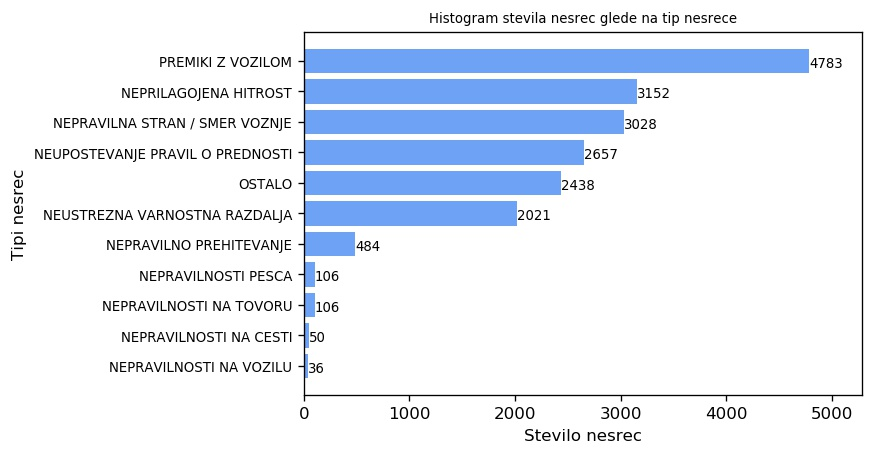

In [5]:
prejsnja = -1
trenutna = -1
vzroki = dict()
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if trenutna == prejsnja:
        prejsnja = trenutna
        continue
    vzrok = row["VzrokNesrece"]
    if vzrok not in vzroki.keys():
        vzroki[vzrok] = 1
    else:
        vzroki[vzrok] += 1
    prejsnja = trenutna

vzroki = sorted(vzroki.items(), key=operator.itemgetter(1))
x = [i[0] for i in vzroki]
y = [i[1] for i in vzroki]
plt.figure(dpi = 120);
plt.barh(x, y, color="#6ea2f5");
plt.title('Histogram stevila nesrec glede na tip nesrece', fontsize=8);
plt.xlabel('Stevilo nesrec');
plt.ylabel('Tipi nesrec');
plt.xlim(0, y[-1] + 500)
plt.yticks(fontsize=8);
for i, v in enumerate(y):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)

### Smrti glede na vzrok nesreče

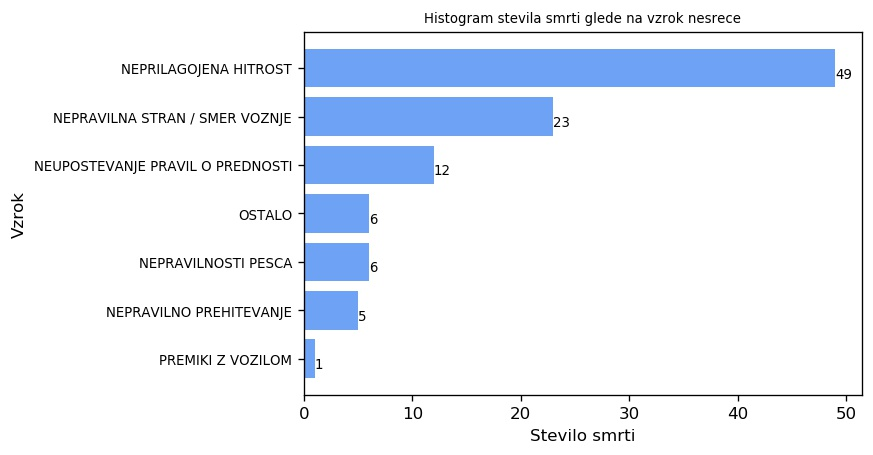

In [6]:
smrti = 0
vsi = 0
vzroki_smrti = dict()

for row in data:
    if row["PoskodbaUdelezenca"] == "SMRT":
        if row["VzrokNesrece"] not in vzroki_smrti.keys():
            vzroki_smrti[row["VzrokNesrece"]] = 0
        vzroki_smrti[row["VzrokNesrece"]] += 1
        
vzroki_smrti_sorted = sorted(vzroki_smrti.items(), key=operator.itemgetter(1))
x = [i[0] for i in vzroki_smrti_sorted]
y = [i[1] for i in vzroki_smrti_sorted]
        
plt.figure(dpi = 120);
plt.barh(x, y, color="#6ea2f5");
plt.title("Histogram stevila smrti glede na vzrok nesrece", fontsize=8)
plt.xlabel('Stevilo smrti');
plt.ylabel('Vzrok');
plt.yticks(fontsize=8);
for i, v in enumerate(y):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)

### Število povzročenih nesreč glede na staž izpita

In [7]:
def pearson(x, y):
    return np.mean(((x - np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)))

-0.9504443990473436

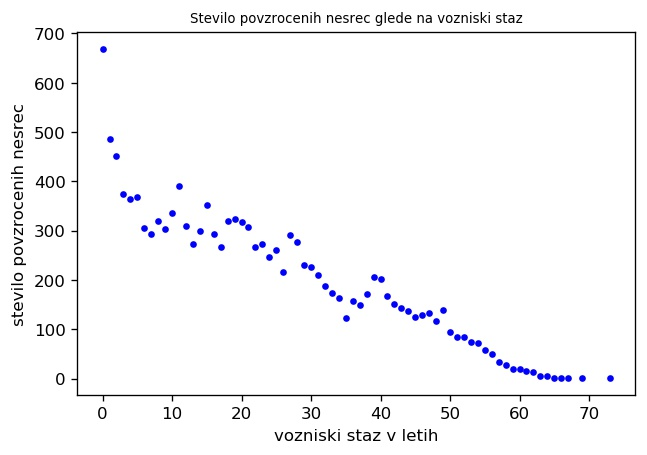

In [13]:
staz_nesrece = dict()

for row in data:
    if int(row["VozniskiStazVLetih"]) == 0 and int(row["VozniskiStazVMesecih"]) == 0:
            continue
    if row["Povzrocitelj"] == "POVZROCITELJ":
        staz = int(row["VozniskiStazVLetih"])
        if staz not in staz_nesrece.keys():
            staz_nesrece[staz] = 0
        staz_nesrece[staz] += 1
        
plt.figure(dpi=120)
plt.plot(list(staz_nesrece.keys()), list(staz_nesrece.values()), ".", color="b")
plt.title('Stevilo povzrocenih nesrec glede na vozniski staz', fontsize=8)
plt.xlabel('vozniski staz v letih')
plt.ylabel('stevilo povzrocenih nesrec');

pearson(list(staz_nesrece.keys()), list(staz_nesrece.values()))

In [75]:
koordinate_datum = dict()
prejsnja = -1
trenutna = -1
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if trenutna == prejsnja or (int(row["GeoKoordinataX"]) == 0 and int(row["GeoKoordinataY"]) == 0):
        prejsnja = trenutna
        continue
    datum = int(row["DatumPN"][3:5])
    if datum not in koordinate_datum.keys():
        koordinate_datum[datum] = list()
    koordinate_datum[datum].append((int(row["GeoKoordinataX"]), int(row["GeoKoordinataY"])))
    prejsnja = trenutna
for key, value in koordinate_datum.items():
    print(key, value[:3])

1 [(101505, 464773), (110757, 456269), (120860, 547660)]
2 [(148872, 414828), (44237, 400788), (112183, 471517)]
3 [(151760, 556163), (170698, 582890), (170832, 547345)]
4 [(160747, 598755), (112846, 451625), (144305, 426225)]
7 [(186928, 595061), (133646, 389565), (105127, 471822)]
5 [(92538, 386768), (156919, 601027), (75257, 441043)]
6 [(100546, 464405), (134593, 532788), (99097, 473936)]
8 [(190121, 593262), (113884, 447435), (117790, 532715)]
9 [(113860, 456395), (52210, 417347), (45544, 403963)]
10 [(99515, 520215), (153710, 550136), (153184, 552640)]
11 [(122217, 545264), (118664, 559557), (56302, 524043)]
12 [(122497, 451501), (81898, 483128), (172099, 554487)]


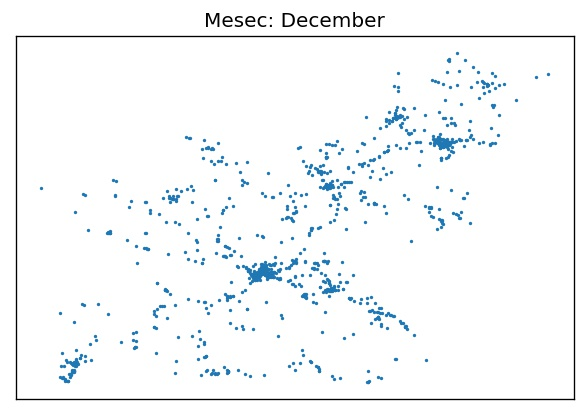

In [86]:
x = [x[0] for x in koordinate_ure[12]]
y = [x[1] for x in koordinate_ure[12]]
plt.figure(dpi=120);
plt.scatter(x, y, s=1);
plt.xticks([], " ");
plt.yticks([], " ");
plt.title("Mesec: December" );
plt.savefig('koordinate_december.png');